# Introduction

## Aim

Analyze and plot hyperparameter tuning for each algorithm

## Prerequisites

Run the `tune_optimizer` from the `training` module and save the output in a `.json` file in `res` folder.

## Imports

In [41]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [42]:
from pathlib import Path

path_benchmark = Path('res')

if not path_benchmark.exists():
    raise ValueError

if len(tuple(path_benchmark.iterdir())) == 0:
    raise ValueError('no hyperparameter tuning data')

# Setup code for benchmark analysis 

In [43]:
import json

def load_res_file(fname: str):
    """Returns a DataFrame from the tuning results and the columns of the DataFrame corresponding to hyperparameters."""
    fpath = path_benchmark.joinpath(f'{fname}.json')
    with open(fpath, 'r') as f:
        res = json.load(f)
        
    df = pd.DataFrame(res)
    hyperparams = df.columns.drop(['loss_train', 'metric_train', 'loss_test', 'metric_test'])
    # Average over folds
    df.loss_train = df.loss_train.apply(lambda e: np.array(e).mean(axis=0))
    df.metric_train = df.metric_train.apply(lambda e: np.array(e).mean(axis=0))
    df.loss_test = df.loss_test.apply(np.mean)
    df['metric_test_std'] = df.metric_test.apply(np.std)
    df.metric_test = df.metric_test.apply(np.mean)
    
    return df, hyperparams

In [55]:
df, par = load_res_file('adam_tuning')
df

,loss_train,metric_train,loss_test,metric_test,lr,beta1,beta2,weight_decay,epsilon,batch_size,metric_test_std
0,"[0.9851281826024254, 0.135418018611148, 0.0791...","[0.7275833333333334, 0.9597083333333334, 0.976...",0.037175,0.989417,0.00008,0.9,0.999,0.01,1.000000e-08,32,0.0
1,"[0.9892517869720856, 0.13499242151000848, 0.07...","[0.7273125, 0.9603333333333334, 0.975791666666...",0.047995,0.986500,0.00008,0.9,0.999,0.10,1.000000e-08,32,0.0
2,"[0.9900570989723007, 0.1411730590099469, 0.089...","[0.7326875, 0.9596666666666667, 0.973854166666...",0.056342,0.982833,0.00008,0.9,0.999,1.00,1.000000e-08,32,0.0
3,"[1.5645842062433561, 0.23967195625106494, 0.12...","[0.5795625, 0.9352291666666667, 0.964020833333...",0.046231,0.985455,0.00008,0.9,0.999,0.01,1.000000e-08,64,0.0
4,"[1.5661626850366592, 0.2378672788689534, 0.123...","[0.579125, 0.9343541666666667, 0.9642083333333...",0.051749,0.984375,0.00008,0.9,0.999,0.10,1.000000e-08,64,0.0
5,"[1.5707497375408808, 0.24351437295476597, 0.13...","[0.575375, 0.9340625, 0.9628541666666667, 0.97...",0.048311,0.985622,0.00008,0.9,0.999,1.00,1.000000e-08,64,0.0
6,"[2.1937750997543337, 0.7482673124074936, 0.245...","[0.35154166666666664, 0.8540208333333333, 0.93...",0.061564,0.982186,0.00008,0.9,0.999,0.01,1.000000e-08,128,0.0
7,"[2.193179998079936, 0.7490082054932912, 0.2479...","[0.3589583333333333, 0.8516666666666667, 0.933...",0.051046,0.982713,0.00008,0.9,0.999,0.10,1.000000e-08,128,0.0
8,"[2.192529631614685, 0.7583865845998128, 0.2540...","[0.35352083333333334, 0.8520416666666667, 0.93...",0.064664,0.980386,0.00008,0.9,0.999,1.00,1.000000e-08,128,0.0
9,"[0.9006521427656213, 0.11795059521713605, 0.06...","[0.7482916666666667, 0.9651041666666667, 0.978...",0.055744,0.986333,0.00010,0.9,0.999,0.01,1.000000e-08,32,0.0


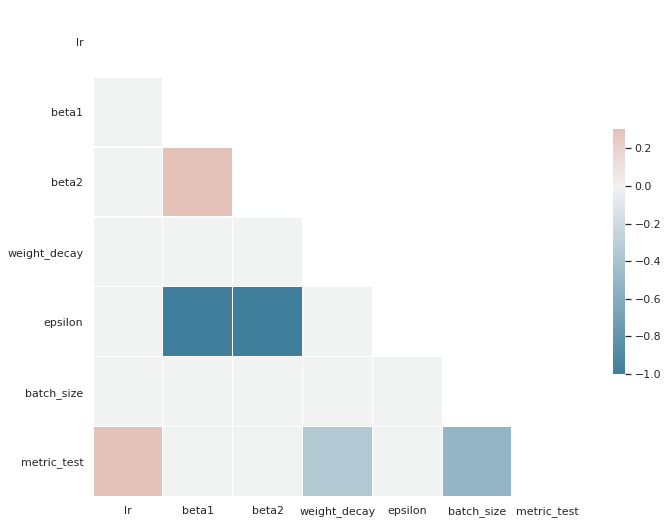

In [56]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df[par.tolist() + ['metric_test']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Univariate plots

Take one param, plot it against test accuracy, will thus have many values for a given value of fixed param -> plot as condfidence interval (shaded area):

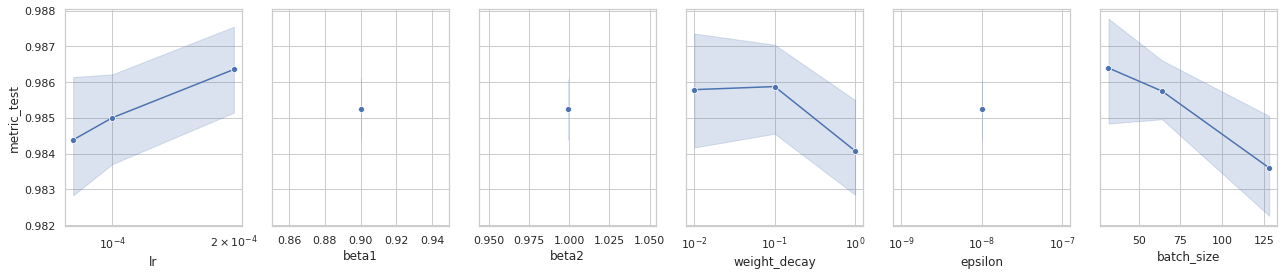

In [57]:
fig, ax = plt.subplots(1, len(par), figsize=(18, 4), sharey=True)

logscale = ['lr', 'epsilon', 'weight_decay']

for p, a in zip(par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, marker='o')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

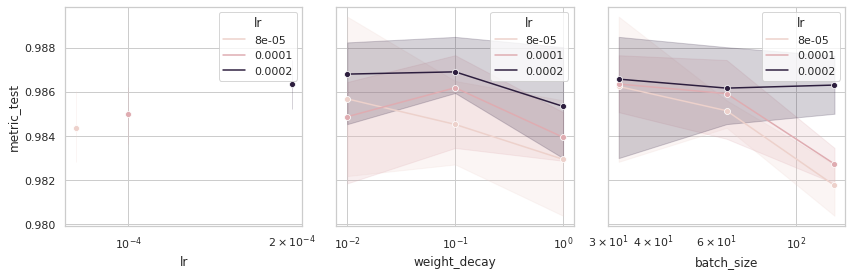

In [64]:
logscale = ['lr', 'epsilon', 'weight_decay', 'batch_size']
plot_par = ['lr', 'weight_decay', 'batch_size']

fig, ax = plt.subplots(1, len(plot_par), figsize=(12, 4), sharey=True)

for p, a in zip(plot_par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='lr', marker='o')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

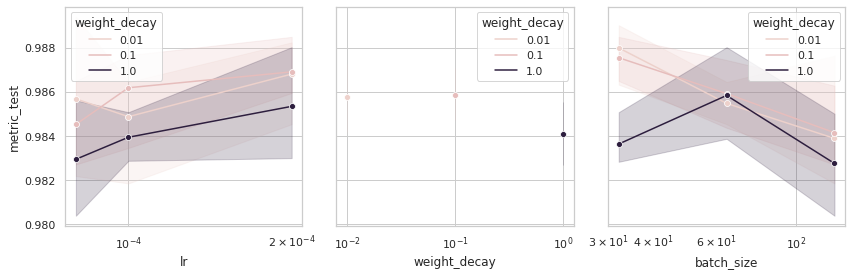

In [66]:
fig, ax = plt.subplots(1, len(plot_par), figsize=(12, 4), sharey=True)

for p, a in zip(plot_par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='weight_decay', marker='o')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

In [84]:
top_config = df.drop(columns=['loss_train', 'metric_train']).sort_values(['metric_test', 'metric_test_std'], ascending=False).head(10)
top_config.reset_index(drop=True, inplace=True)
top_config

,loss_test,metric_test,lr,beta1,beta2,weight_decay,epsilon,batch_size,metric_test_std
0,0.037175,0.989417,0.00008,0.9,0.999,0.01,1.000000e-08,32,0.0
1,0.043336,0.988500,0.00020,0.9,0.999,0.10,1.000000e-08,32,0.0
2,0.044568,0.988250,0.00020,0.9,0.999,0.01,1.000000e-08,32,0.0
3,0.041443,0.988032,0.00020,0.9,0.999,1.00,1.000000e-08,64,0.0
4,0.041631,0.987667,0.00010,0.9,0.999,0.10,1.000000e-08,32,0.0
5,0.040248,0.987644,0.00020,0.9,0.999,0.01,1.000000e-08,128,0.0
6,0.040772,0.987450,0.00010,0.9,0.999,0.10,1.000000e-08,64,0.0
7,0.047995,0.986500,0.00008,0.9,0.999,0.10,1.000000e-08,32,0.0
8,0.043595,0.986453,0.00010,0.9,0.999,0.01,1.000000e-08,64,0.0
9,0.055744,0.986333,0.00010,0.9,0.999,0.01,1.000000e-08,32,0.0


In [86]:
print(top_config.drop(columns=['loss_test', 'metric_test', 'metric_test_std']).T.to_json(indent=2))

{
  "0":{
    "lr":0.00008,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.01,
    "epsilon":0.00000001,
    "batch_size":32.0
  },
  "1":{
    "lr":0.0002,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.1,
    "epsilon":0.00000001,
    "batch_size":32.0
  },
  "2":{
    "lr":0.0002,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.01,
    "epsilon":0.00000001,
    "batch_size":32.0
  },
  "3":{
    "lr":0.0002,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":1.0,
    "epsilon":0.00000001,
    "batch_size":64.0
  },
  "4":{
    "lr":0.0001,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.1,
    "epsilon":0.00000001,
    "batch_size":32.0
  },
  "5":{
    "lr":0.0002,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.01,
    "epsilon":0.00000001,
    "batch_size":128.0
  },
  "6":{
    "lr":0.0001,
    "beta1":0.9,
    "beta2":0.999,
    "weight_decay":0.1,
    "epsilon":0.00000001,
    "batch_size":64.0
  },
  "7":{
    "lr":0.00008,
 

### Old results (coarse grids)

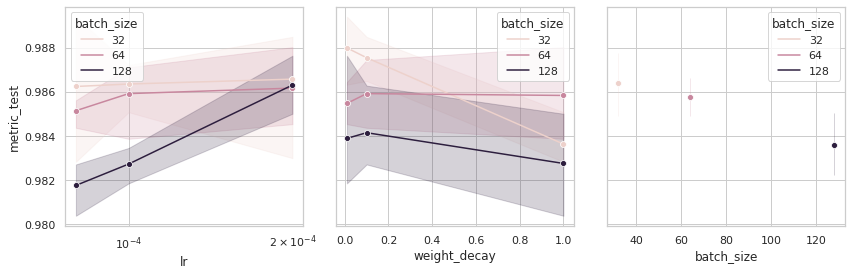

In [67]:
logscale = ['lr', 'epsilon']
plot_par = ['lr', 'weight_decay', 'batch_size']

fig, ax = plt.subplots(1, len(plot_par), figsize=(12, 4), sharey=True)

for p, a in zip(plot_par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='batch_size', marker='o')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

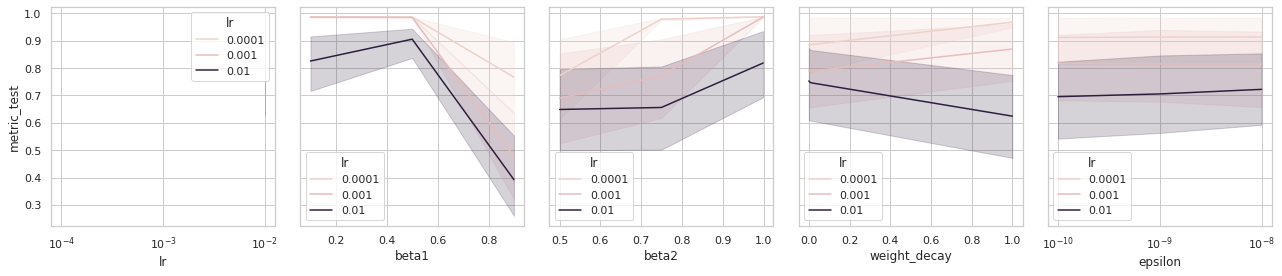

In [51]:
fig, ax = plt.subplots(1, len(par), figsize=(18, 4), sharey=True)

for p, a in zip(par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='lr')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

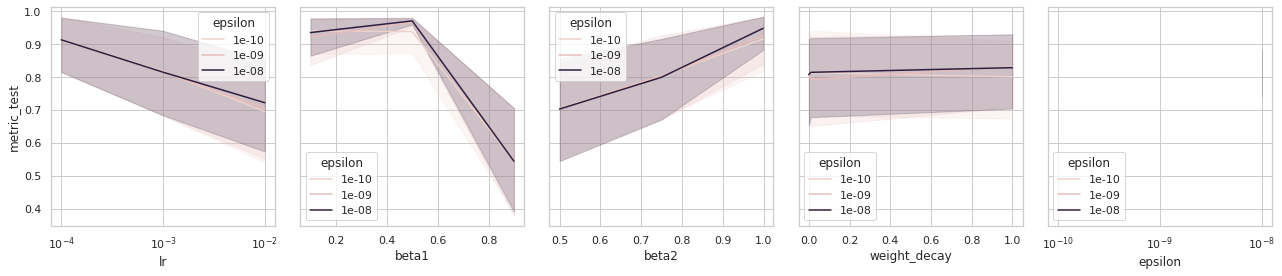

In [52]:
fig, ax = plt.subplots(1, len(par), figsize=(18, 4), sharey=True)

for p, a in zip(par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='epsilon')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

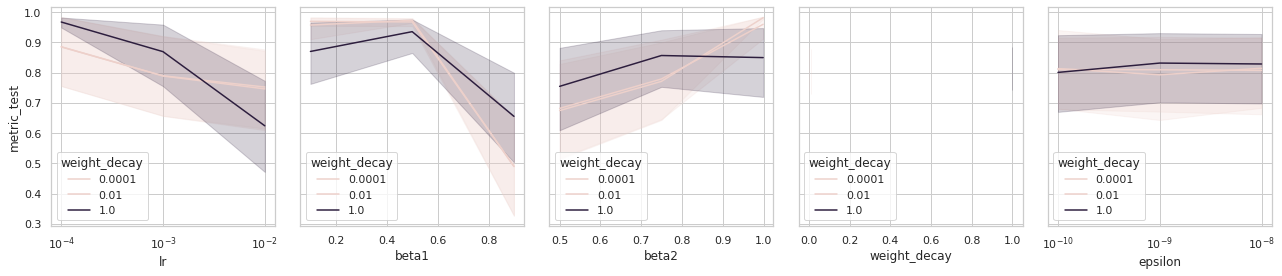

In [53]:
fig, ax = plt.subplots(1, len(par), figsize=(18, 4), sharey=True)

for p, a in zip(par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='weight_decay')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

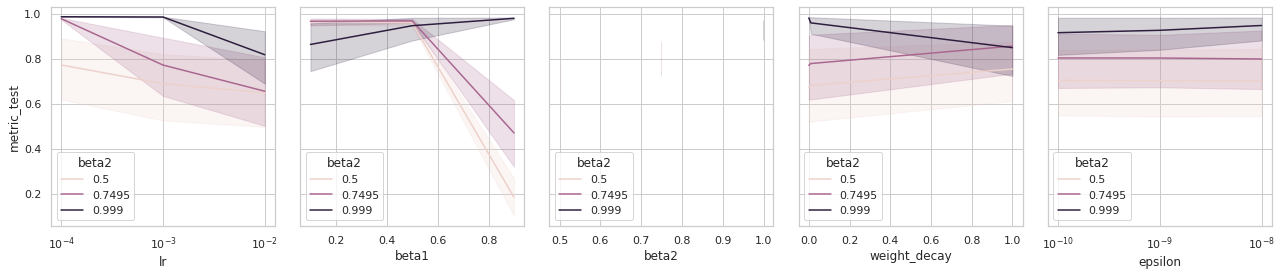

In [54]:
fig, ax = plt.subplots(1, len(par), figsize=(18, 4), sharey=True)

for p, a in zip(par, ax):
    sns.lineplot(x=p, y='metric_test', data=df, ax=a, hue='beta2')
    if p in logscale:
        a.set_xscale('log')
    
plt.tight_layout()

# Nesterov

In [25]:
df, par = load_res_file('nesterov_tuning')
par

Index(['lr', 'batch_size'], dtype='object')

In [26]:
df

,loss_train,metric_train,loss_test,metric_test,lr,batch_size,metric_test_std
0,"[1.0362153348209957, 0.11705364113727894, 0.06...","[0.7064541666666667, 0.9643499999999999, 0.979...",0.070433,0.984483,0.00005,32,0.001781
1,"[1.7440423794845739, 0.3250394724443555, 0.129...","[0.5171749999999999, 0.9098291666666667, 0.960...",0.045489,0.987566,0.00005,64,0.001015
2,"[2.2462334739685064, 1.2425956624587378, 0.384...","[0.29422916666666665, 0.7464875, 0.8949, 0.936...",0.055020,0.983056,0.00005,128,0.001591
3,"[0.7894864935464071, 0.08743801613347993, 0.05...","[0.774675, 0.9727041666666667, 0.9834249999999...",0.132979,0.977867,0.00010,32,0.002969
4,"[1.349500105990718, 0.1873685463264895, 0.0841...","[0.622025, 0.9452708333333334, 0.9737666666666...",0.051376,0.986785,0.00010,64,0.002424
5,"[2.126051558812459, 0.5686669065495332, 0.2288...","[0.4042458333333333, 0.8562583333333335, 0.933...",0.048081,0.985766,0.00010,128,0.001152
6,"[0.4256313717435793, 0.08645664500425262, 0.12...","[0.8789583333333333, 0.9743458333333332, 0.967...",2.306588,0.102783,0.00050,32,0.008226
7,"[0.7070918336969491, 0.08119045995769751, 0.05...","[0.7982166666666666, 0.9747125000000001, 0.983...",0.206679,0.968152,0.00050,64,0.003867
8,"[1.226156854622563, 0.15295060119057696, 0.074...","[0.6563541666666667, 0.9541708333333334, 0.976...",0.053332,0.986547,0.00050,128,0.001384


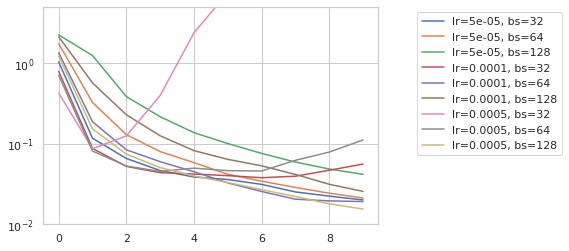

In [39]:
cols = sns.color_palette()
ncol = len(cols)

for i, row in df.sort_values('lr').iterrows():
    col = cols[i % ncol]
    ls = '-' if i < ncol else '--'
    plt.semilogy(row.loss_train, label=f'lr={row.lr:.3}, bs={row.batch_size}', color=col, ls=ls)
    
plt.ylim(bottom=1e-2, top=5)
plt.legend(bbox_to_anchor=(1.1,1));

Note that some lr do not even appear as they have `nan`s (the learning rate was wayyyyy too big). 

(0.95, 1.0)

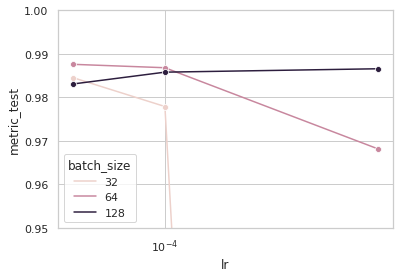

In [36]:
sns.lineplot(x='lr', y='metric_test', hue='batch_size', data=df, marker='o')
for b in df.batch_size.unique():
    sub = df[df.batch_size ==]
plt.xscale('log')
plt.ylim(0.95, 1.0)

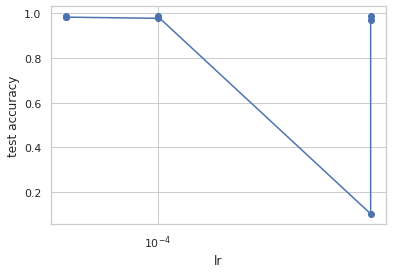

In [30]:
plt.semilogx(df.lr, df.metric_test, '-o')
plt.ylabel('test accuracy')
plt.xlabel('lr');

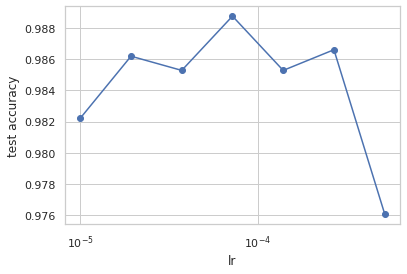

In [64]:
plt.semilogx(df[df.lr < 0.001].lr, df[df.lr < 0.001].metric_test, '-o')
plt.ylabel('test accuracy')
plt.xlabel('lr');

In [74]:
df.sort_values('metric_test', ascending=False).lr.iloc[0]

7.196856730011514e-05